In [8]:
import torch
import torch.nn as nn
import os
from mmdet.apis import init_detector, inference_detector, show_result,show_result_pyplot
from mmdet.models import build_detector
import mmcv
from mmcv.runner import load_checkpoint
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from mmdet.datasets import build_dataset
from mmdet.datasets.loader import build_dataloader
import matplotlib 
matplotlib.rcParams['font.sans-serif']=['SimHei'] # 用黑体显示中文 
matplotlib.rcParams['axes.unicode_minus']=False
import time

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3"  # specify which GPU(s) to be used
device='cuda:2'

config_file = 'configs/my.py'
checkpoint_file = 'work_dirs/retinanet_x101_64x4d_fpn_1x/latest.pth' # faster_rcnn_x101_64x4d_fpn_1x or retinanet_x101_64x4d_fpn_1x
config = mmcv.Config.fromfile(config_file)

In [9]:
def get_model(config_file = 'configs/my.py',
              checkpoint_file = 'work_dirs/retinanet_x101_64x4d_fpn_1x/latest.pth',
            device='cuda:0'):
    model = init_detector(config_file, checkpoint_file, device=device)
    return model


def get_result_box(img_path,model,score_thr=0.7):
    '''

    :param img_path: 图像的路径
    :param model: 加载好的预训练模型
    :param score_thr: 后处理，只输出概率值大于thr的框
    :return:
    '''
    result = inference_detector(model, img_path)
    if isinstance(result, tuple):
        bbox_result, segm_result = result
    else:
        bbox_result, segm_result = result, None
    bboxes = np.vstack(bbox_result)
    inds = np.where(bboxes[:, -1] > score_thr)[0]
    bboxes_over_thr = bboxes[inds]
    return bboxes_over_thr

In [10]:
model = get_model(config_file=config_file,checkpoint_file=checkpoint_file,device=device)

In [11]:
ds = build_dataset(config.data.test)
dl =build_dataloader(ds, 1, 1,dist=False)
dl = iter(dl)
conta = next(dl)

In [8]:
img_path = conta['img_meta'][0].data[0][0]['filename']
bboxes = get_result_box(img_path=img_path,model=model,score_thr=0.7)

In [9]:
bboxes

array([[232.48192  , 175.99586  , 581.4398   , 505.4867   ,   0.7802436]],
      dtype=float32)

In [12]:
class_in_pinyin = ('chang ma jia',
 'gu feng',
 'duan ma jia',
 'bei xin shang yi',
 'bei dai ku',
 'lian ti yi',
 'diao dai shangyi',
 'zhong ku',
 'duan xiu chen shan',
 'wu xiu shang yi',
 'chang xiu chen shan',
 'zhong deng ban shen qun',
 'chang ban shen qun',
 'chang wai tao',
 'duan qun',
 'wu xiu lian yi qun',
 'duan ku',
 'duan wai tao',
 'chang xiu lian yi qun',
 'chang xiu shang yi',
 'chang ku',
 'duan xiu lian yi qun',
 'duan xiu shang yi')

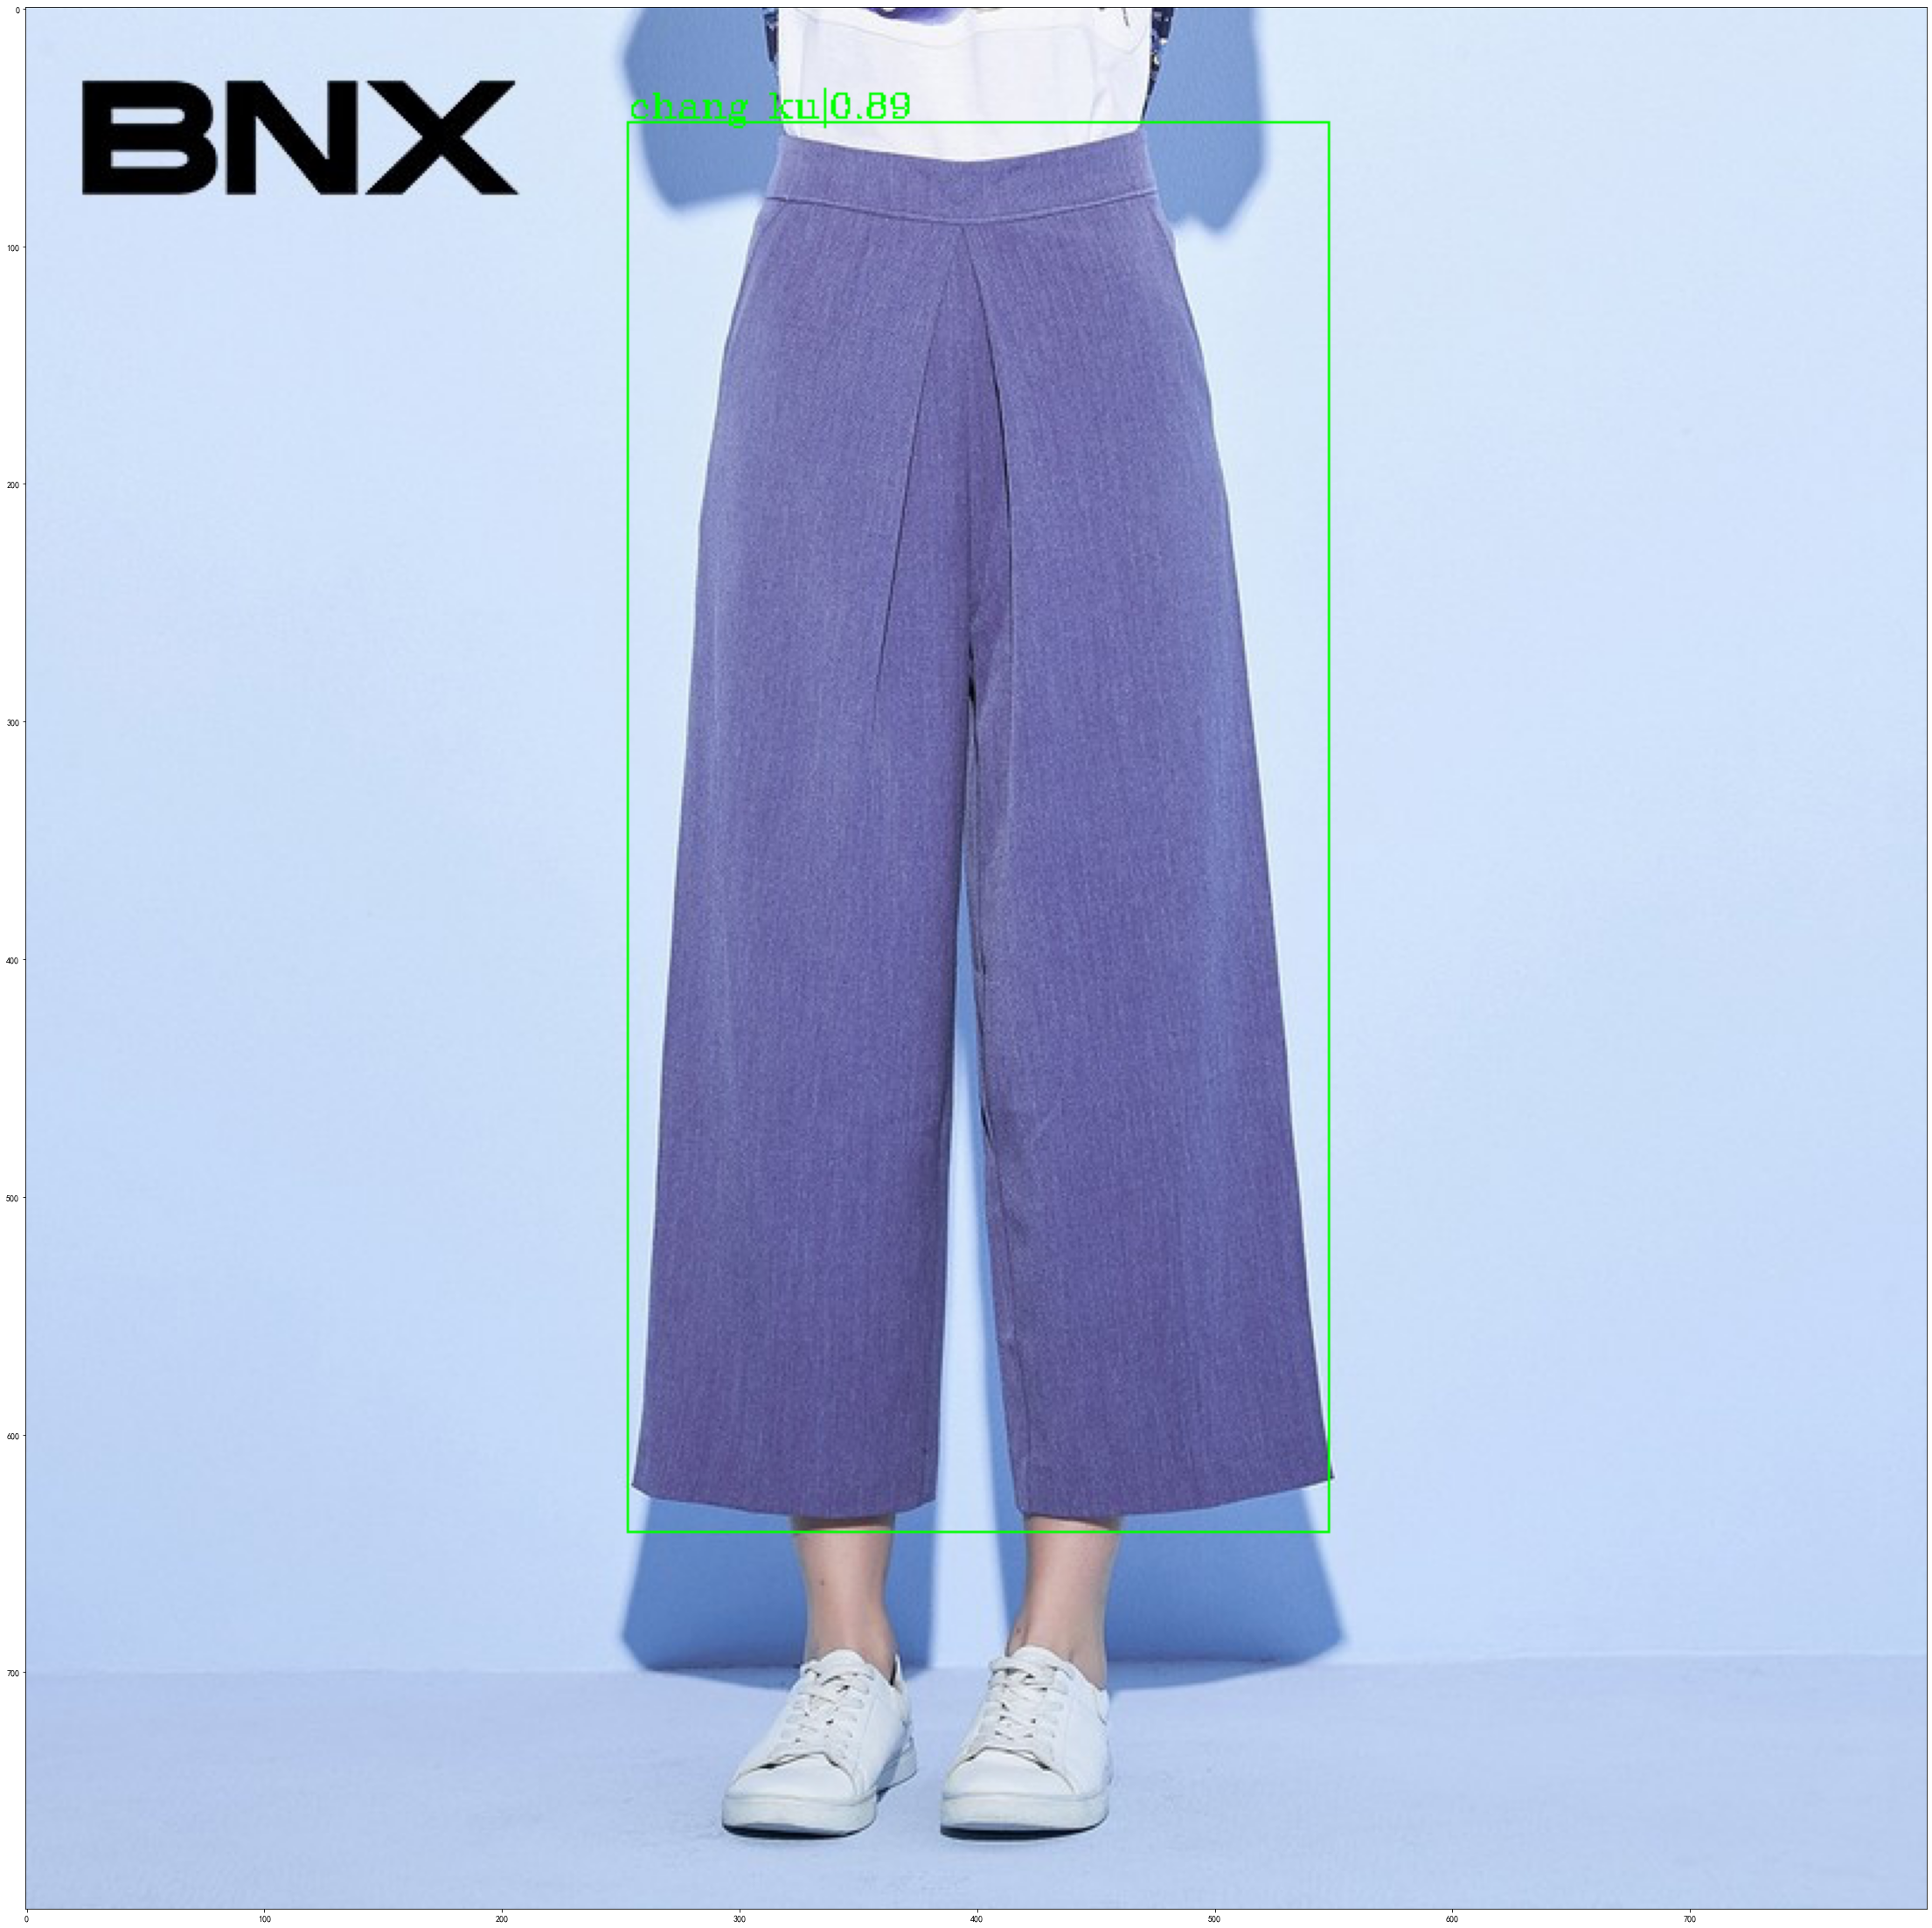

In [15]:
# visualize the results in a new window
# plt.figure(figsize=(40,40))
# for conta in dl:
#     img_name = conta['img_meta'][0].data[0][0]['filename']
#     result = inference_detector(model, img_name)
#     img = show_result(img_name, result, class_in_pinyin, score_thr=0.7,show=False,wait_time=0)
#     plt.imshow(mmcv.bgr2rgb(img))
#     break
    

In [ ]:
plt.figure(figsize=(40,40))
conta = next(dl)
# img_name = conta['img_meta'][0].data[0][0]['filename']
img_name = 'demo/my_test.png'
starttime = time.time()
result = inference_detector(model, img_name)
endtime = time.time()
img = show_result(img_name, result, class_in_pinyin, score_thr=0.7,show=False,wait_time=0)
plt.imshow(mmcv.bgr2rgb(img))
print("程序运行时间：%.8s s" % (endtime-starttime))

程序运行时间：0.646086 s


In [3]:
import time
tt = time.time()

In [5]:
starttime = time.time()

In [6]:
endtime = time.time()
endtime-starttime

0.6425745487213135

NameError: name 'mmcv' is not defined